In [2]:
!pip install sympy

  Obtaining dependency information for sympy from https://files.pythonhosted.org/packages/d2/05/e6600db80270777c4a64238a98d442f0fd07cc8915be2a1c16da7f2b9e74/sympy-1.12-py3-none-any.whl.metadata
  Obtaining dependency information for mpmath>=0.19 from https://files.pythonhosted.org/packages/43/e3/7d92a15f894aa0c9c4b49b8ee9ac9850d6e63b03c9c32c0367a13ae62209/mpmath-1.3.0-py3-none-any.whl.metadata
   ---------------------------------------- 5.7/5.7 MB 9.7 MB/s eta 0:00:00
   --------------------------------------- 536.2/536.2 kB 11.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
import sympy as sp
import scipy as sc

In [5]:
dfc = pd.read_csv("D:/proyeto cripto/tradingbot/cristian/scrips/by1h/BTCUSDT")
# df = df.set_index(df.Tiempo)
dfc  

,Tiempo,Open,High,Low,Close,Volume
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...,...
57823,2024-03-27 19:00:00,68475.60,68933.33,68468.01,68652.00,1505.426370
57824,2024-03-27 20:00:00,68652.01,69163.01,68630.00,68906.02,1062.903970
57825,2024-03-27 21:00:00,68906.01,69250.00,68900.00,68941.99,1093.453870
57826,2024-03-27 22:00:00,68942.00,69441.40,68919.46,69440.14,1447.007180


In [17]:
dft = pd.read_csv(f'C:/Users/tinma/OneDrive/Escritorio/tradingbot/csvs/historical/by1h/BTCUSDT')
# df = df.set_index(df.Tiempo)
dft  

,Tiempo,Open,High,Low,Close,Volume
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...,...
57823,2024-03-27 19:00:00,68475.60,68933.33,68468.01,68652.00,1505.426370
57824,2024-03-27 20:00:00,68652.01,69163.01,68630.00,68906.02,1062.903970
57825,2024-03-27 21:00:00,68906.01,69250.00,68900.00,68941.99,1093.453870
57826,2024-03-27 22:00:00,68942.00,69441.40,68919.46,69440.14,1447.007180


In [18]:
dft.Tiempo = dft.Tiempo.astype('datetime64')

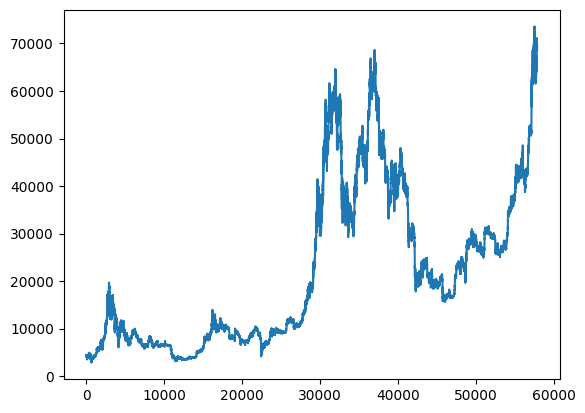

In [19]:
import matplotlib.pyplot as plt
plt.plot(dft.Open)

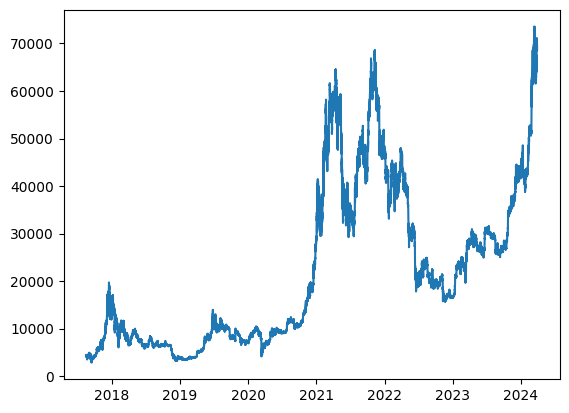

In [28]:
import matplotlib.pyplot as plt
plt.plot(dft.Tiempo,dft.Open)

In [49]:
dft['Interpolacion'] = sc.signal.savgol_filter(dft.Open,10000,3)
dft

,Tiempo,Open,High,Low,Close,Volume,Interpolacion
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,541.323959
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,548.042603
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,554.758601
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,561.471954
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,568.182663
...,...,...,...,...,...,...,...
57823,2024-03-27 19:00:00,68475.60,68933.33,68468.01,68652.00,1505.426370,69781.081248
57824,2024-03-27 20:00:00,68652.01,69163.01,68630.00,68906.02,1062.903970,69800.211678
57825,2024-03-27 21:00:00,68906.01,69250.00,68900.00,68941.99,1093.453870,69819.347987
57826,2024-03-27 22:00:00,68942.00,69441.40,68919.46,69440.14,1447.007180,69838.490175


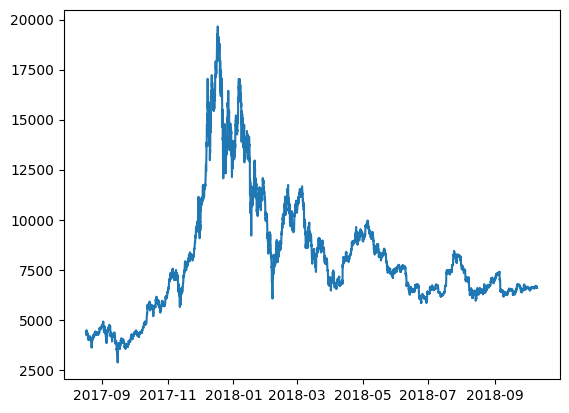

In [51]:
plt.plot(dft.Tiempo[:10000],dft.Interpolacion[:10000])

c:\Users\tinma\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


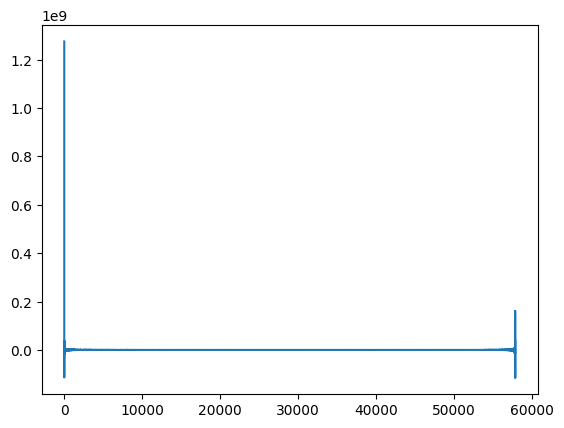

In [60]:
# from .fft import fft, fftfreq

yf = sc.fft.fft(dft.Open.to_numpy())
dft['Fourier_Freq'] = yf

plt.plot(dft.Fourier_Freq)
